In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import itertools

In [134]:
courses = pd.read_csv('../data/courses.csv').dropna(subset=['course_published_at_local']).sort_values(by=['course_published_at_local'])
courses = courses.drop(['teacher_id', 'required_tools', 'recommended_background', 'target_group', 'will_learn', 'description', 'topics', 'teacher_intro'], axis=1)
courses[:5]

,course_id,course_name,course_price,groups,sub_groups,groups+subgroups,course_published_at_local
1,54d5a117065a7e0e00725ac0,幾何圖形分割 X 色塊組合,100,"藝術,設計","平面設計,繪畫與插畫","設計_平面設計,藝術_繪畫與插畫",42090.98472
2,54d5d9952246e60a009ec571,數位拼貼的手感,300,"藝術,設計","平面設計,電腦繪圖","設計_平面設計,藝術_電腦繪圖",42090.98472
3,54d7148a2246e60a009ec588,Line 的貼圖自己動手做！,185,"藝術,設計","平面設計,應用設計,電腦繪圖","設計_平面設計,設計_應用設計,藝術_電腦繪圖",42090.98472
4,5513e92b38239d10005778e1,為申請學校或工作寫好英文自傳,600,"職場技能,語言","求職,英文","語言_英文,職場技能_求職",42144.83056
5,55307d94d530a90a00a3a896,糖果娃娃 - 學校畢業紀念娃娃,150,手作,手作小物,手作_手作小物,42149.00139


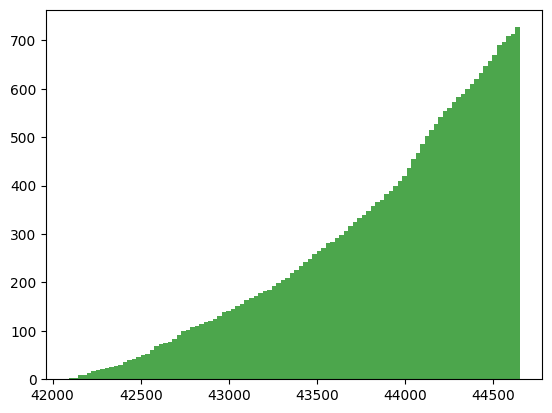

In [135]:
n, bins, patches = plt.hist(courses['course_published_at_local'].to_list(), 100,color ='green',alpha = 0.7, cumulative=True)

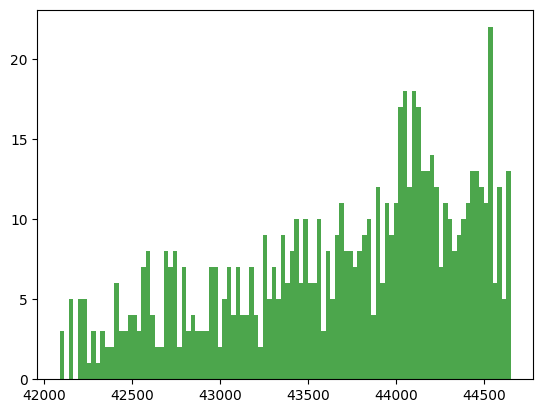

In [136]:
n, bins, patches = plt.hist(courses['course_published_at_local'].to_list(), 100, color ='green',alpha = 0.7)

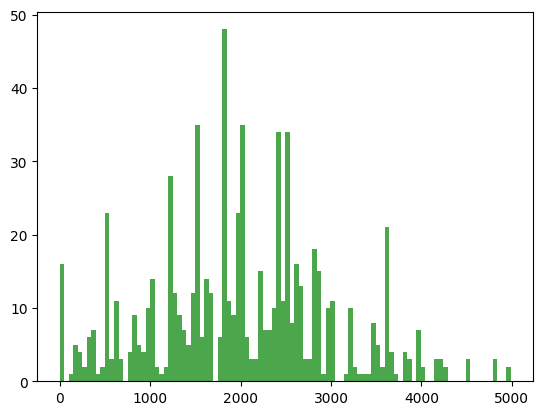

In [137]:
n, bins, patches = plt.hist([x for x in courses['course_price'].to_list() if x <= 5000], 100, color ='green',alpha = 0.7)

In [138]:
train_csv = pd.read_csv('../data/train.csv')
train_csv

,user_id,course_id
0,5bdecbfffec014002166796a,5f194354cad0d086f3ee24cf
1,5fedf958af850a915c86362c,5bfd47782d018e0020e4b0e4 5fc4a352d375951a03cc0...
2,5fd255c43136a460c6f3f930,598053e0acc137070007186a 6031136edd9bc1681035b892
3,5a0bde2aa15b3f001e98429a,5fc5ed671be929537e5283bb 5fc5edae001c9102feab8...
4,5fedf8132a0eb0bfab27882b,5e8e9d3c5a140c3d1e1c5245
...,...,...
59732,6114c700aa04ce00067265a5,61034f3d4ef8b500067afc1c
59733,60e66f29be3e3b0006c4db75,55ae208a7b4d9910001198f2
59734,60e2b05ee742c300072ff5b3,600538ff0cf6c91168243a88
59735,60da0995947dfc0fb61ef296,5edf464fb54d0f59f0e7d96a


In [139]:
course_price = {}
for (course, price) in zip(courses['course_id'].to_list(), courses['course_price'].to_list()):
    course_price[course] = price
list(course_price.items())[:10]

[('54d5a117065a7e0e00725ac0', 100),
 ('54d5d9952246e60a009ec571', 300),
 ('54d7148a2246e60a009ec588', 185),
 ('5513e92b38239d10005778e1', 600),
 ('55307d94d530a90a00a3a896', 150),
 ('551a6be023774e0a001eb20c', 200),
 ('551171a938239d1000577864', 1000),
 ('54f1268f4ec3c809002e4a29', 588),
 ('55599687dfe21b0a00e776d9', 500),
 ('559e49185850311000fca504', 199)]

In [140]:
user_max_will = {}
for user, course in zip(train_csv['user_id'].to_list(), train_csv['course_id'].to_list()):
    m = 0
    for c in course.split(' '):
        p = course_price[c]
        if(p > m):
            m = p
    user_max_will[user] = m
list(user_max_will.items())[:10]

[('5bdecbfffec014002166796a', 2250),
 ('5fedf958af850a915c86362c', 4230),
 ('5fd255c43136a460c6f3f930', 2580),
 ('5a0bde2aa15b3f001e98429a', 0),
 ('5fedf8132a0eb0bfab27882b', 2400),
 ('5f5d9e4920a34fbd95fdbd23', 0),
 ('5b8e7ed6de22ba001ee7acfb', 3400),
 ('5bb0de3cc3964c001eec52a7', 3800),
 ('5fe42590e810e1085785e967', 1800),
 ('5fee0188af850aeca8864127', 0)]

In [141]:
course_price_time = courses[['course_id', 'course_price', 'course_published_at_local']].sort_values(by=['course_price', 'course_published_at_local'])
course_price_time_sort_lst = course_price_time['course_id'].to_list()
course_price_time_sort_lst

['5e8d70a52aa77e6f34d6fded',
 '5ef0a2198e8212c4e6335387',
 '5ef099ab678184065fd4d426',
 '5ef0a8a5775dea0566e6cb5f',
 '5f7c212262ad2203e77a1cc9',
 '5f7c209762ad22756c7a1c74',
 '5f7c210b1de7982fb413a3e9',
 '5fc5edae001c9102feab8ecf',
 '5fc5ed671be929537e5283bb',
 '5fc5ee1b08b74a6e3723abd2',
 '6030c9cd99e14cc2401e66b9',
 '60cb0a440dabda80019d5f7c',
 '60c84de9eb75ca46e0c25e85',
 '6155cda6d425f500065f5c96',
 '6156a77fdf426a0007cc5fe1',
 '6184efc3b2319400078aefe7',
 '54d5a117065a7e0e00725ac0',
 '55307d94d530a90a00a3a896',
 '557ad62bd736230f00adb2ab',
 '54d7148a2246e60a009ec588',
 '559e49185850311000fca504',
 '55ae208a7b4d9910001198f2',
 '551a6be023774e0a001eb20c',
 '556ad58777a8710900bedffe',
 '57638167f1399b0900e23d71',
 '581c3a59cca880070070561b',
 '559a217dcfe8320b00ccd75b',
 '55a4d6397b4d99100011957d',
 '54d5d9952246e60a009ec571',
 '5591501e6dec460f00111314',
 '5593f992cfe8320b00ccd4c4',
 '55e82d8efa223d100058f6f4',
 '56402c70423bdd0a00104993',
 '58edb2824909c907004aa38b',
 '55e66f33fa22

In [142]:
course_gp_price = {}
for id, price, groups in zip(courses['course_id'], courses['course_price'], courses['groups'].dropna()):
    for s in groups.split(','):
        try:
            course_gp_price[s].append([id, price])
        except:
            course_gp_price[s] = [[id, price]]
    if(groups.count(',') == 1):
        try:
            course_gp_price[groups.replace(',',' ')].append([id, price])
        except:
            course_gp_price[groups.replace(',',' ')] = [[id, price]]
for k in course_gp_price.keys():
    course_gp_price[k].sort(key=lambda x: x[1])
course_gp_price

{'藝術': [['60c84de9eb75ca46e0c25e85', 0],
  ['6155cda6d425f500065f5c96', 0],
  ['54d5a117065a7e0e00725ac0', 100],
  ['54d7148a2246e60a009ec588', 185],
  ['551a6be023774e0a001eb20c', 200],
  ['54d5d9952246e60a009ec571', 300],
  ['5591501e6dec460f00111314', 300],
  ['5593f992cfe8320b00ccd4c4', 300],
  ['55e82d8efa223d100058f6f4', 300],
  ['56402c70423bdd0a00104993', 300],
  ['5639fe25423bdd0a00103d55', 350],
  ['563b54ff423bdd0a00103e90', 400],
  ['57bc8be49ab5080700399c1c', 450],
  ['55e3dccbfa223d100058f3cb', 500],
  ['5606262ac61d930a00455fad', 500],
  ['56499b1542ee8d100033a0fa', 500],
  ['5638945e423bdd0a00103c4f', 500],
  ['54f1268f4ec3c809002e4a29', 588],
  ['564b945342ee8d100033a216', 600],
  ['563ea99a423bdd0a001047ed', 600],
  ['56ce9b4f182fba0e00c6c0c1', 600],
  ['566985d25f4374480075cc85', 600],
  ['567b85a350562140005e6b86', 650],
  ['56810fdd50562140005e6fce', 750],
  ['578ce3ced0c3030700416c46', 800],
  ['586ec677a8aae907000cdd6f', 800],
  ['5697dfb64ec4c609007d1b5f', 950],

In [143]:
users = pd.read_csv('../data/users.csv').fillna('')
users

,user_id,gender,occupation_titles,interests,recreation_names
0,54ccaa73a784960a00948687,female,,"職場技能_創業,藝術_電腦繪圖,設計_介面設計,設計_動態設計,設計_平面設計,投資理財_投...",
1,54dca4456d7d350900e86bae,male,,"設計_動態設計,設計_平面設計,設計_應用設計,程式_程式入門,程式_程式語言,藝術_角色設...",
2,54e421bac5c9c00900cd8d47,female,,"設計_平面設計,職場技能_資料彙整,藝術_繪畫與插畫,行銷_數位行銷,職場技能_文書處理,職...",
3,54e961d4c5c9c00900cd8d84,other,金融業,"投資理財_理財,攝影_影像創作,投資理財_投資觀念,藝術_更多藝術,音樂_樂器,投資理財_金...",
4,54e9b744c5c9c00900cd8d8a,other,"資訊科技,法律、社會及文化專業,非營利組織","程式_網頁前端,投資理財_理財,投資理財_投資觀念,程式_程式語言,設計_設計理論,投資理財...","政治經濟,社會服務,舞台劇,電影"
...,...,...,...,...,...
130561,62e09de8fc3d3500060d4211,female,,"語言_英文,設計_介面設計,設計_網頁設計,設計_設計理論,程式_軟體程式開發與維護,行銷_...",
130562,62f0823a8c4414000667c592,,,,
130563,631b86242145060007efc7dd,,,,
130564,6331648104ed0f000610dfd2,male,公務人員,"投資理財_理財,攝影_影像創作,攝影_後製剪輯,攝影_商業攝影,投資理財_投資觀念","旅行旅遊,運動健身,金融理財,電影"


In [144]:
# user_dict = {}
# for user, interest in zip(users['user_id'], users['interests']):
#     temp = []
#     for i in interest.split(','):
#         gp = i.split('_')[0]
#         if(gp not in temp):
#             temp.append(gp)
#     if('' in temp):
#         temp.remove('')
#     user_dict[user] = temp
# with open('../data/user_list.json', 'w') as f:
#     f.write(json.dumps(user_dict))

In [145]:
with open('../data/user_list.json', 'r') as f:
    user_dict = json.load(f)
list(user_dict.items())[:10]

[('54ccaa73a784960a00948687', ['職場技能', '藝術', '設計', '投資理財', '行銷']),
 ('54dca4456d7d350900e86bae', ['設計', '程式', '藝術', '音樂']),
 ('54e421bac5c9c00900cd8d47', ['設計', '職場技能', '藝術', '行銷']),
 ('54e961d4c5c9c00900cd8d84', ['投資理財', '攝影', '藝術', '音樂']),
 ('54e9b744c5c9c00900cd8d8a', ['程式', '投資理財', '設計']),
 ('54eac49bc5c9c00900cd8d95', ['行銷', '投資理財']),
 ('54ef3499b839040f0001607d', ['攝影', '設計', '藝術']),
 ('54ef34e2b839040f00016086', ['職場技能', '行銷']),
 ('54ef354db839040f0001608b', ['音樂', '藝術', '程式']),
 ('54ef3574b839040f0001608f', ['職場技能', '程式', '設計', '藝術'])]

In [146]:
seen_unseen = 'unseen'
test_user = pd.read_csv('../data/test_' + seen_unseen + '.csv')
test_user

,user_id,course_id
0,5f1dc5a3afdc0537b5de8979,6156a77fdf426a0007cc5fe1
1,5f432175a32a53813a24e1a5,6156a77fdf426a0007cc5fe1
2,5a93a2b844a1e4001eee7a26,6156a77fdf426a0007cc5fe1
3,617ec17d1a87ca000710ce8f,6156a77fdf426a0007cc5fe1
4,614c3233e64756000603277d,6156a77fdf426a0007cc5fe1
...,...,...
11092,61cf079c1647a30006557fc0,6156a77fdf426a0007cc5fe1
11093,5f54a406f24eac7d75f12cfa,6156a77fdf426a0007cc5fe1
11094,61cf1fec2a965800074634b6,6156a77fdf426a0007cc5fe1
11095,5e8f93b33856b2f1f465aeca,6156a77fdf426a0007cc5fe1


In [147]:
top_k = 200
answer = {}
for user in unseen_user['user_id'][:]:
    cand_p2 = []
    for idx in list(itertools.permutations(user_dict[user], 2)):
        try:
            cand_p2 += course_gp_price[' '.join(list(idx))]
        except:
            pass
    answer[user] = ' '.join([x[0] for x in sorted(cand_p2, key=lambda x:x[1])[:top_k]])
    if(len(answer[user]) < top_k):
        cand_p1 = []
        for idx in user_dict[user]:
            cand_p1 += course_gp_price[idx]
        answer[user] += ' '.join([x[0] for x in sorted(cand_p1, key=lambda x:x[1])[:top_k - len(cand_p2)]])
        if(len(answer[user]) < top_k):
            answer[user] += ' '.join(course_price_time_sort_lst[:(top_k - len(cand_p2) - len(cand_p1))])
        
print(answer['5f1dc5a3afdc0537b5de8979'])

5864e19cf108e00800c24f7a 587f29666ecf3a0700b77d40 5c2417a649b19c002047e937 5b3b080baa5ff8001e22316e 60ffeb101f74d40006fe3fd8 5fb7565f2945a52e5e2dca8a 60a75465029722874f0c1f16 5baf7243c3964c001eebcd8d 5a2e3baea6501f001e2eb5eb 5ce792eaea2d0500209a9389 5d77176845639e00212bc562 5fe6fe2c5a5ba942b377c5ec 5b6adb26715919001e50fb0f 5b1d3e30567cc1001e40ba13 5eb16929dd5b57f1c6659d51 5dbe90cfa4b1c600214d0ab5 5f0ecaa2cad0d00d06e46aa8 5f0e2a2071bf470b216f6d25 5a1cf54016b785001ed44e79 5cbe85a3d180040020052629 5edf464fb54d0f59f0e7d96a 5dbece44a4b1c600214d153b


In [148]:
with open('./submit_' + seen_unseen + '_course.csv', 'w') as f:
    f.write('user_id,course_id\n')
    for id in test_user['user_id']:
        f.write('{},{}\n'.format(id, answer[id]))